training
running preds
doing plots


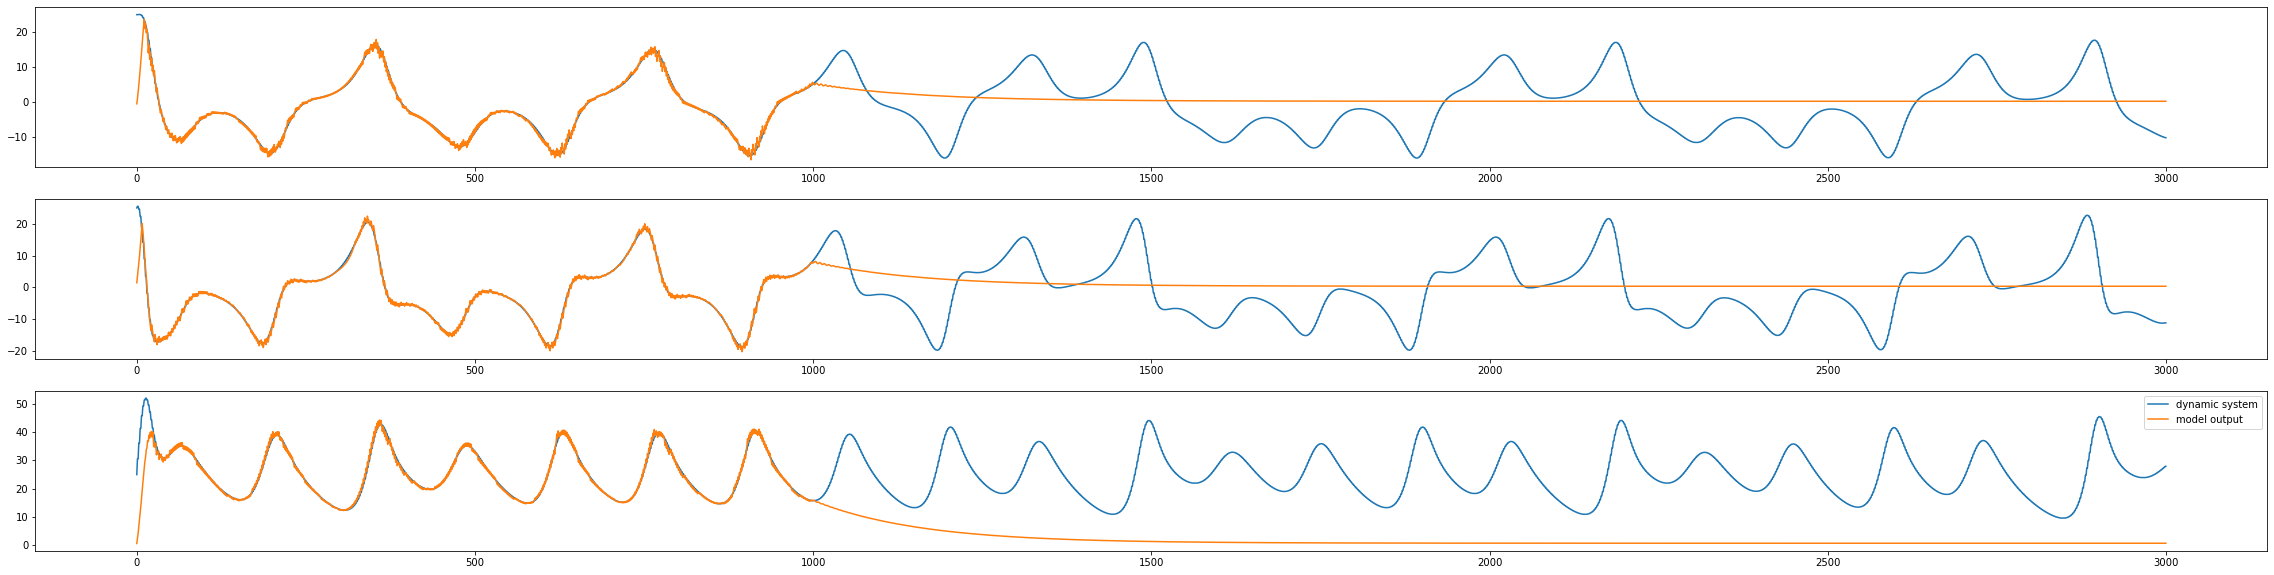

[array([ 5.4092364,  7.6910815, 15.88896  ], dtype=float32), array([ 5.089604 ,  7.7388906, 15.918488 ], dtype=float32), array([ 4.9494424,  7.9781547, 15.831973 ], dtype=float32), array([ 5.0643196,  8.163481 , 15.62908  ], dtype=float32), array([ 5.2988772,  8.109322 , 15.404067 ], dtype=float32), array([ 5.429996,  7.836065, 15.26343 ], dtype=float32), array([ 5.3328776,  7.540135 , 15.239005 ], dtype=float32), array([ 5.0755205,  7.4237304, 15.267103 ], dtype=float32), array([ 4.851187 ,  7.5309997, 15.246208 ], dtype=float32), array([ 4.8140154,  7.7226434, 15.121506 ], dtype=float32), array([ 4.95696  ,  7.8004756, 14.92615  ], dtype=float32), array([ 5.1279917,  7.6714683, 14.748725 ], dtype=float32), array([ 5.16244 ,  7.416102, 14.658019], dtype=float32), array([ 5.016934 ,  7.2119966, 14.648706 ], dtype=float32), array([ 4.796558 ,  7.1839957, 14.650479 ], dtype=float32), array([ 4.6602244,  7.306685 , 14.589114 ], dtype=float32), array([ 4.6887083,  7.4347253, 14.446721 ], d

In [92]:
import importlib
import main,input,reservoir,output
importlib.reload(main)
importlib.reload(input)
importlib.reload(reservoir)
importlib.reload(output)


d_r=1000 #dimension of reservoir
tp=1/3 #training portion of lorenz data, always<1. e.g. tp=2/3 means first 2/3 of the generated dynamic system data used for training
lr=.001 #learning rate for training
#adjust more params of the original dynamic system generated in input.lorenz() of input.py or in any call site of this func.
#most other params are using hyperparam from Hybrid Forecasting of Chaotic Processing paper (2018), Pathak et al..
i,r,o,train,pred=main.main(d_r,tp,lr)
print(pred)

#graph plots x,y,z coordinates from both the generated dynamic system and the RP output against time.

In [93]:
import torch
import numpy
print(o.out(torch.FloatTensor(numpy.zeros(d_r))))
print(train[-3],train[-2],train[-1],pred[0],pred[1])

tensor([ 0.0245, -0.0051, -0.0056], grad_fn=<AddBackward0>)
[ 5.1396217  7.8542414 15.938631 ] [ 4.8627877  7.577406  15.661798 ] [ 5.67249   7.93194  15.844631] [ 5.4092364  7.6910815 15.88896  ] [ 5.089604   7.7388906 15.918488 ]


In [94]:
print(train[100])

[-4.5957494 -1.3999348 26.422693 ]
